In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/gdrive/MyDrive/data/master_Jaf_edited.csv')


In [ ]:

#Import required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---

sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

In [ ]:
df.head()

,sex,age,bmi,smoking,alcohol,cannabis,amphetamines,cocaine,contacts_count,public_transport_count,...,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication
0,male,20_30,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
1,female,30_40,21.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
2,male,90_100,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,1,0,1,0,0,0,NaN
3,male,60_70,32.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,1,0,0,0,NaN
4,male,30_40,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
df.drop(df[(df['sex'] == 'other') | (df['sex'] == 'undefined')].index, axis=0, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# encode the values of the 'specific_feature' column in the df
df['smoking'] = le.fit_transform(df['smoking'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# encode the values of the 'specific_feature' column in the df
df['working'] = le.fit_transform(df['working'])

In [ ]:
df.head()

,sex,age,bmi,smoking,alcohol,cannabis,amphetamines,cocaine,contacts_count,public_transport_count,...,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication
0,1,20_30,27.7,8,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
1,0,30_40,21.6,8,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
2,1,90_100,27.7,8,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,1,0,1,0,0,0,NaN
3,1,60_70,32.4,8,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,1,0,0,0,NaN
4,1,30_40,25.4,8,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
df.isnull().sum()

sex                               0
age                               1
bmi                               0
smoking                           0
alcohol                        1887
cannabis                     286068
amphetamines                 306393
cocaine                      308594
contacts_count                 4233
public_transport_count       686340
working                           0
rate_reducing_risk_single         0
rate_reducing_mask             1847
covid19_positive                  0
covid19_symptoms                  0
covid19_contact                   0
asthma                            0
kidney_disease                    0
liver_disease                     0
compromised_immune                0
heart_disease                     0
lung_disease                      0
diabetes                          0
hiv_positive                      0
hypertension                      0
other_chronic                     0
nursing_home                      0
health_worker               

In [ ]:
df.drop(columns=['prescription_medication', 'public_transport_count'], inplace=True)
df.head()

,sex,age,bmi,smoking,alcohol,cannabis,amphetamines,cocaine,contacts_count,working,...,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker
0,1,20_30,27.7,8,NaN,NaN,NaN,NaN,NaN,5,...,0,0,0,0,0,0,0,0,0,0
1,0,30_40,21.6,8,NaN,NaN,NaN,NaN,NaN,5,...,0,0,0,0,0,0,0,0,0,0
2,1,90_100,27.7,8,NaN,NaN,NaN,NaN,NaN,5,...,0,1,0,1,1,0,1,0,0,0
3,1,60_70,32.4,8,NaN,NaN,NaN,NaN,NaN,5,...,0,0,0,0,1,0,1,0,0,0
4,1,30_40,25.4,8,NaN,NaN,NaN,NaN,NaN,5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,bmi,smoking,alcohol,cannabis,amphetamines,cocaine,contacts_count,working,rate_reducing_risk_single,rate_reducing_mask,...,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker
count,1.019962e+06,1.019962e+06,1.018075e+06,733894.000000,713569.000000,711368.000000,1.015729e+06,1.019962e+06,1.019962e+06,1.018115e+06,...,1.019962e+06,1.019962e+06,1.019962e+06,1.019962e+06,1.019962e+06,1.019962e+06,1.019962e+06,1.019962e+06,1.019962e+06,1.019962e+06
mean,2.933390e+01,1.566844e+00,2.792948e+00,2.691281,-0.707051,-0.778251,7.512690e+00,2.091487e+00,6.790057e-01,2.816531e+00,...,2.529506e-03,5.645014e-02,1.927719e-02,1.491624e-02,6.242880e-02,3.175609e-03,1.407268e-01,7.141933e-02,9.225834e-04,2.024781e-02
std,7.798050e+00,2.310504e+00,4.221040e+00,8.391001,2.022621,1.069804,6.646006e+00,1.096088e+00,6.604387e-01,1.331084e+00,...,5.023057e-02,2.307890e-01,1.374976e-01,1.212178e-01,2.419328e-01,5.626302e-02,3.477397e-01,2.575241e-01,3.036006e-02,1.408469e-01
min,1.000000e+01,0.000000e+00,-1.000000e+00,-2.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,-2.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.370000e+01,0.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000,3.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.770000e+01,0.000000e+00,1.000000e+00,-1.000000,-1.000000,-1.000000,5.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.330000e+01,3.000000e+00,4.000000e+00,0.000000,-1.000000,-1.000000,1.000000e+01,3.000000e+00,1.000000e+00,4.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.471000e+02,8.000000e+00,1.400000e+01,28.000000,28.000000,28.000000,2.100000e+01,5.000000e+00,2.000000e+00,5.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
counts = df['covid19_positive'].value_counts()
print(counts)

0    1007810
1      12152
Name: covid19_positive, dtype: int64


**Remove all the null values from each feature**


In [ ]:
df.isna().sum()

sex                               0
age                               1
bmi                               0
smoking                           0
alcohol                        1887
cannabis                     286068
amphetamines                 306393
cocaine                      308594
contacts_count                 4233
working                           0
rate_reducing_risk_single         0
rate_reducing_mask             1847
covid19_positive                  0
covid19_symptoms                  0
covid19_contact                   0
asthma                            0
kidney_disease                    0
liver_disease                     0
compromised_immune                0
heart_disease                     0
lung_disease                      0
diabetes                          0
hiv_positive                      0
hypertension                      0
other_chronic                     0
nursing_home                      0
health_worker                     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer



# Identify columns with null values
null_cols = df.columns[df.isnull().any()]

# Impute null values with mean value
imputer = SimpleImputer(strategy='mean')
df[null_cols] = imputer.fit_transform(df[null_cols])

ValueError: ignored

In [ ]:
df.isnull().sum()

sex                          0
age                          0
bmi                          0
smoking                      0
alcohol                      0
cannabis                     0
amphetamines                 0
cocaine                      0
contacts_count               0
working                      0
rate_reducing_risk_single    0
rate_reducing_mask           0
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_positive                 0
hypertension                 0
other_chronic                0
nursing_home                 0
health_worker                0
dtype: int64

In [ ]:
df1 = df.copy()
df1.head()

,sex,age,bmi,smoking,alcohol,cannabis,amphetamines,cocaine,contacts_count,working,...,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker
97,0,50_60,28.1,0,0.0,-1.0,-1.0,-1.0,10.0,3,...,0,0,0,0,0,0,1,0,0,0
98,0,30_40,23.5,7,-1.0,-1.0,-1.0,-1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
100,0,30_40,26.6,3,0.0,0.0,0.0,0.0,3.0,2,...,0,0,0,0,0,0,0,0,0,0
103,0,50_60,52.9,7,0.0,0.0,-1.0,-1.0,4.0,2,...,0,0,0,0,0,0,1,0,0,0
106,0,40_50,23.2,1,0.0,0.0,-1.0,-1.0,7.0,0,...,0,0,0,0,0,0,0,1,0,0


**Heatmap**

<ipython-input-18-51837d7489cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


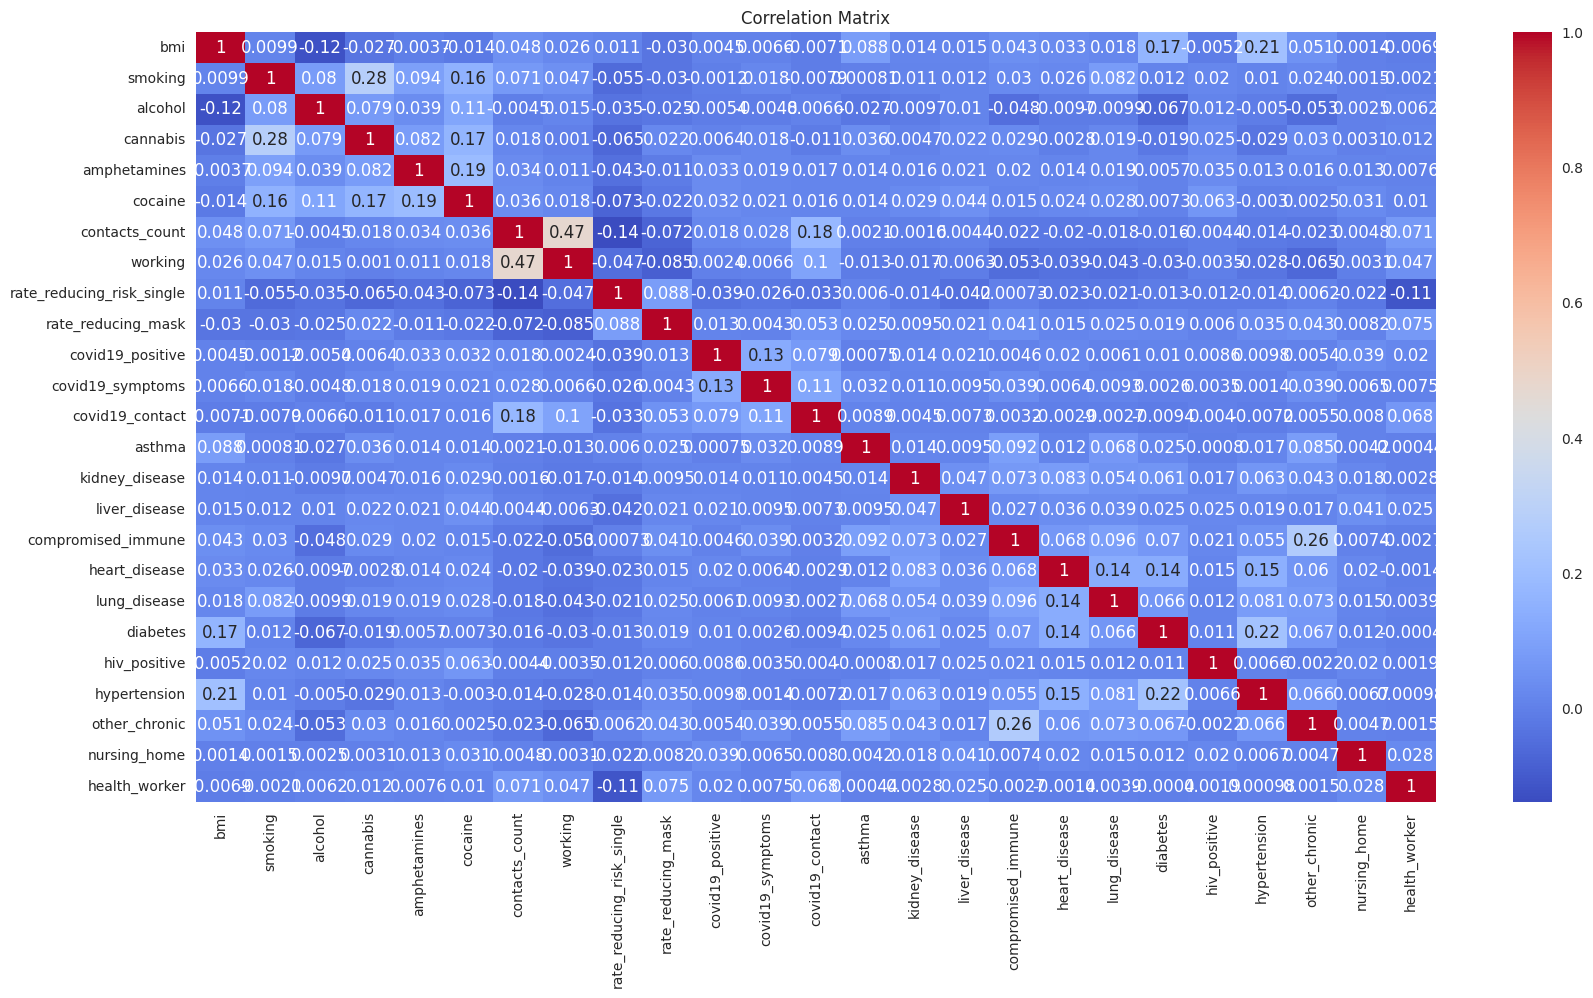

In [ ]:

# calculate the correlation matrix
corr_matrix = df1.corr()

# set the figure size
plt.figure(figsize=(20, 10))

# plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
counts = df1['covid19_positive'].value_counts()
print(counts)

0    696948
1      1814
Name: covid19_positive, dtype: int64


In [ ]:
# separating the dependent features
x = df1.drop(['covid19_positive'], axis = 1)
y = df1['covid19_positive']

In [ ]:
# Get the list of feature names
feature_names = list(x.columns)

# Print the list of feature names
print(feature_names)

['sex', 'age', 'bmi', 'smoking', 'alcohol', 'cannabis', 'amphetamines', 'cocaine', 'contacts_count', 'working', 'rate_reducing_risk_single', 'rate_reducing_mask', 'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease', 'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive', 'hypertension', 'other_chronic', 'nursing_home', 'health_worker']


**SMOTE directly on dataset**

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE object
smote = SMOTE()

# Resample the data
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check the class distribution after resampling
print(f"Class distribution after SMOTE: {np.bincount(y_resampled)}")

Class distribution after SMOTE: [696948 696948]


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(X_resampled)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.3, random_state=4)

LSVM

Accuracy of LSVM: 0.7887050450894255
Error of LSVM: 0.21129495491057448
Precision of LSVM: 0.8030584363630874
Recall of LSVM: 0.7642881088070494
F1-score of LSVM: 0.7831937556896394
AUC-ROC of LSVM: 0.8731736855481753
Gini Coefficient of LSVM: 0.7463473710963506
MCC of LSVM: 0.5780549855935644
Prediction Time of LSVM: 3.504753112792969e-05


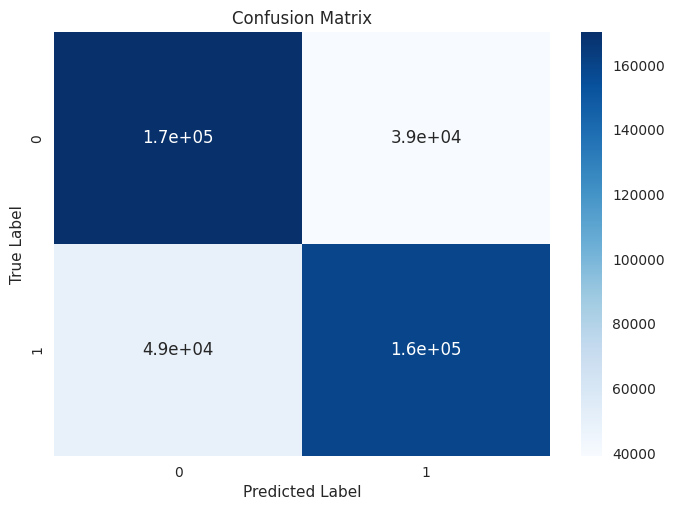

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix

# --- Applying LSVM ---
LSVMclassifier = LinearSVC()
LSVMclassifier.fit(x_train, y_train)

y_pred_LSVM = LSVMclassifier.predict(x_test)

# Calculate evaluation metrics
ac = accuracy_score(y_test, y_pred_LSVM)
error = 1 - ac
precision = precision_score(y_test, y_pred_LSVM)
recall = recall_score(y_test, y_pred_LSVM)
f1 = f1_score(y_test, y_pred_LSVM)
auc_roc = roc_auc_score(y_test, LSVMclassifier.decision_function(x_test))
gini_coeff = (2*auc_roc) - 1

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred_LSVM)

# Print evaluation metrics
print("Accuracy of LSVM:", ac)
print("Error of LSVM:", error)
print("Precision of LSVM:", precision)
print("Recall of LSVM:", recall)
print("F1-score of LSVM:", f1)
print("AUC-ROC of LSVM:", auc_roc)
print("Gini Coefficient of LSVM:", gini_coeff)
print("MCC of LSVM:", mcc)

# Calculate prediction time
import time
start_time = time.time()
p_time = time.time() - start_time
print("Prediction Time of LSVM:", p_time)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_LSVM)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential',
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)
# Calculate accuracy
ac_GB = accuracy_score(y_test, y_pred_GB)
precision_GB = precision_score(y_test, y_pred_GB)
recall_GB = recall_score(y_test, y_pred_GB)
f1_GB = f1_score(y_test, y_pred_GB)
auc_roc_GB = roc_auc_score(y_test, y_pred_GB)
gini_coeff = (2*auc_roc_GB) - 1
print("Accuracy of GB:", ac_GB)
print("Precision of GB:", precision_GB)
print("Recall of GB:", recall_GB)
print("F1-score of GB:", f1_GB)
print("AUC-ROC of GB:", auc_roc_GB)
print("Gini Coefficient of GB:", gini_coeff)
# Calculate MCC
mcc_GB = matthews_corrcoef(y_test, y_pred_GB)
print("MCC of GB:", mcc_GB)

# Calculate prediction time
import time
start_time = time.time()

p_time = time.time() - start_time
print("Prediction Time:", p_time)


Accuracy of GB: 0.9190375183239312
Precision of GB: 0.9394504169597107
Recall of GB: 0.8955845026579187
F1-score of GB: 0.9169931595851619
AUC-ROC of GB: 0.9190067680203842
Gini Coefficient of GB: 0.8380135360407683
MCC of GB: 0.8389776463915727
Prediction Time: 4.100799560546875e-05


In [ ]:

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred_logreg = logreg.predict(x_test)

# Calculate evaluation metrics
ac = accuracy_score(y_test, y_pred_logreg)
error = 1 - ac
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
auc_roc = roc_auc_score(y_test, logreg.decision_function(x_test))
gini_coeff = (2*auc_roc) - 1

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred_logreg)

# Print evaluation metrics
print("Accuracy of LR:", ac)
print("Error of LR:", error)
print("Precision of LR:", precision)
print("Recall of LR:", recall)
print("F1-score of LR:", f1)
print("AUC-ROC of LR:", auc_roc)
print("Gini Coefficient of LR:", gini_coeff)
print("MCC of LR:", mcc)

# Calculate prediction time
import time
start_time = time.time()
p_time = time.time() - start_time
print("Prediction Time of logreg:", p_time)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LR: 0.7897309461007391
Error of LR: 0.21026905389926087
Precision of LR: 0.8011809846521826
Recall of LR: 0.76998706958479
F1-score of LR: 0.7852743656743755
AUC-ROC of LR: 0.8737120318953119
Gini Coefficient of LR: 0.7474240637906238
MCC of LR: 0.5798782836377289
Prediction Time of logreg: 5.2928924560546875e-05


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

#Instantiate AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100)

#Fit the classifier to the training data
adaboost.fit(x_train, y_train)

#Predict the labels for the test data
y_pred_adaboost = adaboost.predict(x_test)

#Calculate evaluation metrics
ac = accuracy_score(y_test, y_pred_adaboost)
error = 1 - ac
precision = precision_score(y_test, y_pred_adaboost)
recall = recall_score(y_test, y_pred_adaboost)
f1 = f1_score(y_test, y_pred_adaboost)
auc_roc = roc_auc_score(y_test, adaboost.predict_proba(x_test)[:, 1])
gini_coeff = (2 * auc_roc) - 1

#Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred_adaboost)

#Print evaluation metrics
print("Accuracy of AdaBoost:", ac)
print("Error of AdaBoost:", error)
print("Precision of AdaBoost:", precision)
print("Recall of AdaBoost:", recall)
print("F1-score of AdaBoost:", f1)
print("AUC-ROC of AdaBoost:", auc_roc)
print("Gini Coefficient of AdaBoost:", gini_coeff)
print("MCC of AdaBoost:", mcc)

#Calculate prediction time
import time
start_time = time.time()
p_time = time.time() - start_time
print("Prediction Time of AdaBoost:", p_time)

Accuracy of AdaBoost: 0.9561469166772286
Error of AdaBoost: 0.04385308332277138
Precision of AdaBoost: 0.9677097759574113
Recall of AdaBoost: 0.9436664910684354
F1-score of AdaBoost: 0.9555369127516778
AUC-ROC of AdaBoost: 0.9914031180850439
Gini Coefficient of AdaBoost: 0.9828062361700878
MCC of AdaBoost: 0.9125718143805811
Prediction Time of AdaBoost: 7.891654968261719e-05
